In [1]:
# EEG NN

In [2]:
## Import Libs

In [73]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import pywt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
#tf.enable_eager_execution()

In [4]:
## Variables And Constants

In [5]:
skipFeatures = 300

In [6]:
## Read Stored Data

In [7]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData_total.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,48,48,49,48,49,49,49,49,49,49,...,35,3,3,3,3,3,3,3,3,right
1,21,21,21,33,33,33,33,33,33,33,...,23,23,23,23,23,23,23,23,44,left
2,35,35,35,35,35,35,35,35,35,35,...,18,18,18,18,18,18,18,18,18,left
3,33,33,33,33,13,13,13,13,13,13,...,41,41,41,41,41,41,41,41,41,left
4,66,66,66,66,66,66,66,66,66,66,...,36,36,36,36,36,36,36,36,36,left


In [8]:
## Scale Features

In [9]:
df.iloc[:,skipFeatures:1000] = preprocessing.StandardScaler().fit_transform(df.iloc[:,skipFeatures:1000])

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
## Plot Average Data

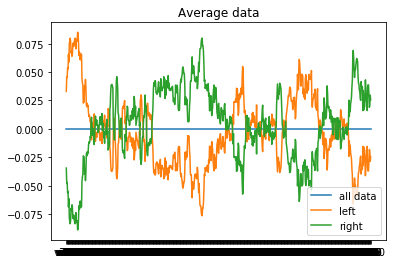

In [11]:
rdf = df.iloc[:,skipFeatures:1000]
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
rdfm = rdf.mean(axis=0)
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(rdfm, label="all data") 
plt.plot(lrdfm, label="left") 
plt.plot(rrdfm, label="right") 
plt.legend()
plt.title("Average data")
plt.show() 

In [12]:
## Plot Differencies

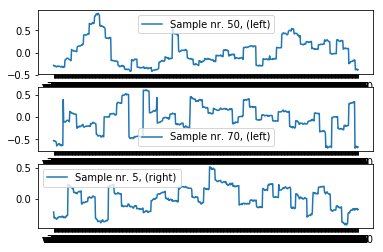

In [13]:
x = np.array([])
input1 = rdf.iloc[50]
v = "Sample nr. 50, (%s)" % (df.iloc[50].label)
plt.subplot(3,1,1)
plt.plot(input1, label=v)
plt.legend()
x = np.array([])
input2 = rdf.iloc[70]
v = "Sample nr. 70, (%s)" % (df.iloc[70].label)
plt.subplot(3,1,2)
plt.plot(input2, label=v)
plt.legend()
input3 = rdf.iloc[5]
v = "Sample nr. 5, (%s)" % (df.iloc[5].label)
plt.subplot(3,1,3)
plt.plot(input3, label=v)
plt.legend()
plt.show()

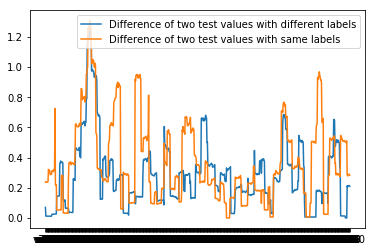

In [14]:
# Needs to be customized based on data
diff = input1-input3
diff2 = input1-input2
plt.plot(np.absolute(diff), label="Difference of two test values with different labels")
plt.plot(np.absolute(diff2), label="Difference of two test values with same labels")
plt.legend()
plt.show()

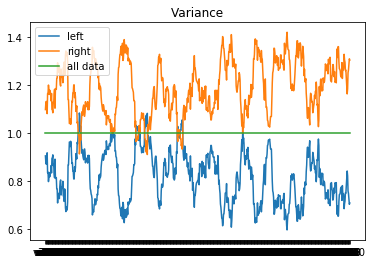

In [15]:
plt.plot(np.var(lrdf, axis=0), label="left")
plt.plot(np.var(rrdf, axis=0), label="right")
plt.plot(np.var(rdf, axis=0), label="all data")
plt.legend()
plt.title("Variance")
plt.show()

In [16]:
## Standard Deviation

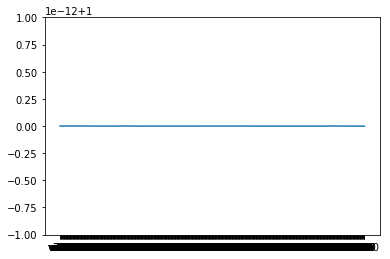

In [17]:
plt.plot(np.std(rdf, axis=0))

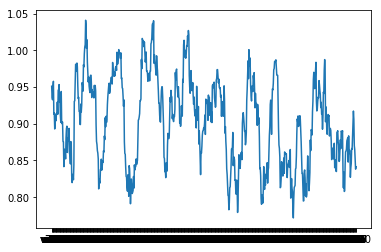

In [18]:
plt.plot(np.std(rdf[df.label=='left'], axis=0))

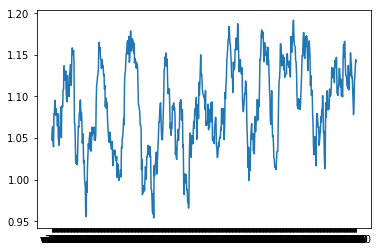

In [19]:
plt.plot(np.std(rdf[df.label=='right'], axis=0))

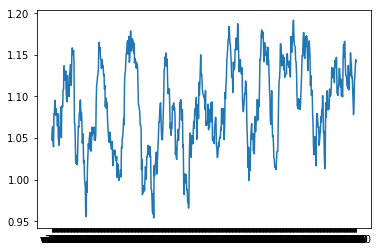

In [20]:
plt.plot(np.std(rrdf, axis=0))

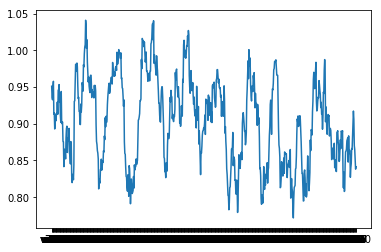

In [21]:
plt.plot(np.std(lrdf, axis=0))

In [22]:
##Fast Fourier Transform

In [23]:
tfc, tfv = rdf.shape
matrix = rdf.to_numpy()

In [24]:
ff = np.zeros(shape=(tfc,tfv), dtype=complex)
c = 0;
for f in matrix:
    x = np.array([])
    for e in f:
        x = np.append(x, int(e))
    ff[c] = np.fft.fft(x)
    c = c+1

C:\Users\Kruspe\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


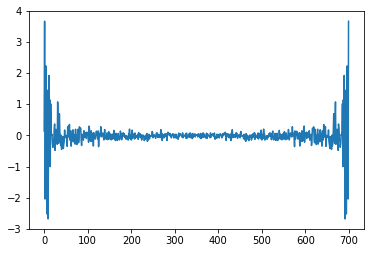

In [25]:
ffm = ff.mean(axis=0)
plt.plot(ffm) 
plt.show() 

In [26]:
##WaveDecomposition

In [27]:
cA2a = np.empty(shape=(tfc,17), dtype=complex)
cD1a = np.empty(shape=(tfc,17), dtype=complex)
cD2a = np.empty(shape=(tfc,28), dtype=complex)
cD3a = np.empty(shape=(tfc,50), dtype=complex)
cD4a = np.empty(shape=(tfc,93), dtype=complex)
cD5a = np.empty(shape=(tfc,180), dtype=complex)
cD6a = np.empty(shape=(tfc,353), dtype=complex)
i = 0;
for w in ff:
    coeffs = pywt.wavedec(w, 'db4', level=6)
    cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs
    cA2a[i] = cD1
    cD1a[i] = cA2
    cD2a[i] = cD2
    cD3a[i] = cD3
    cD4a[i] = cD4
    cD5a[i] = cD5
    cD6a[i] = cD6
    i = i+1
#ca = np.append(ca, coeffs)
#ca = np.append(ca, coeffs)
#for wd in ff:
    #coeffs = pywt.wavedec(x, 'db4', level=6)
    #cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

In [28]:
print (cA2.shape,cD1.shape,cD2.shape,cD3.shape,cD4.shape,cD5.shape, cD6.shape)

(17,) (17,) (28,) (50,) (93,) (180,) (353,)


In [29]:
##Average Channel Values

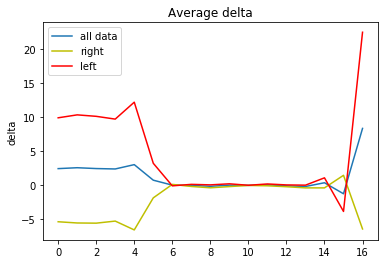

In [30]:
cD1am = cD1a.mean(axis=0)
cD1aml = cD1a[df.label=="left"].mean(axis=0)
cD1amr = cD1a[df.label=="right"].mean(axis=0)
plt.plot(cD1am, label="all data") 
plt.plot(cD1amr, 'y', label="right") 
plt.plot(cD1aml, 'r', label="left") 
plt.ylabel("delta")
plt.legend()
plt.title("Average delta")
plt.show() 

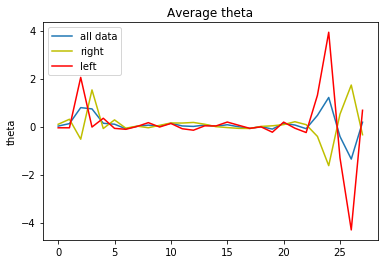

In [93]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)
cD2amr = cD2a[df.label=="right"].mean(axis=0)
plt.plot(cD2am, label="all data") 
plt.plot(cD2amr, 'y', label="right") 
plt.plot(cD2aml, 'r', label="left") 
plt.ylabel("theta")
plt.legend()
plt.title("Average theta")
plt.show() 

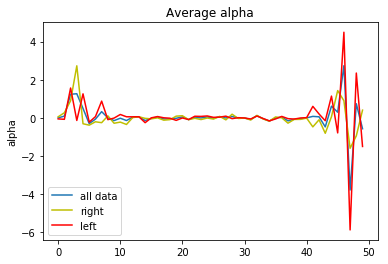

In [32]:
cD3am = cD3a.mean(axis=0)
cD3aml = cD3a[df.label=="left"].mean(axis=0)
cD3amr = cD3a[df.label=="right"].mean(axis=0)
plt.plot(cD3am, label="all data") 
plt.plot(cD3amr, 'y', label="right") 
plt.plot(cD3aml, 'r', label="left") 
plt.ylabel("alpha")
plt.legend()
plt.title("Average alpha")
plt.show() 

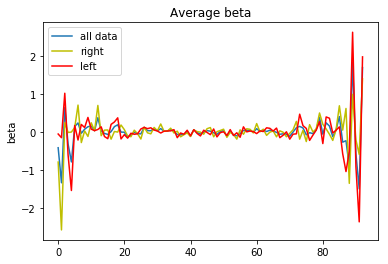

In [33]:
cD4am = cD4a.mean(axis=0)
cD4aml = cD4a[df.label=="left"].mean(axis=0)
cD4amr = cD4a[df.label=="right"].mean(axis=0)
plt.plot(cD4am, label="all data") 
plt.plot(cD4amr, 'y', label="right") 
plt.plot(cD4aml, 'r', label="left") 
plt.ylabel("beta")
plt.legend()
plt.title("Average beta")
plt.show() 

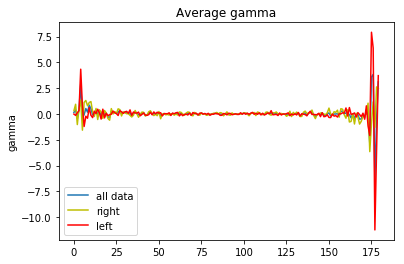

In [34]:
cD5am = cD5a.mean(axis=0)
cD5aml = cD5a[df.label=="left"].mean(axis=0)
cD5amr = cD5a[df.label=="right"].mean(axis=0)
plt.plot(cD5am, label="all data") 
plt.plot(cD5amr, 'y', label="right") 
plt.plot(cD5aml, 'r', label="left") 
plt.ylabel("gamma")
plt.legend()
plt.title("Average gamma")
plt.show() 

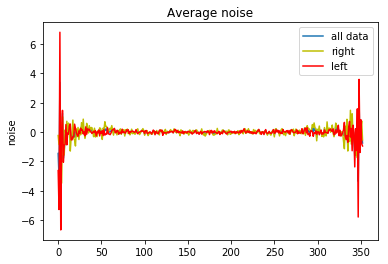

In [35]:
cD6am = cD6a.mean(axis=0)
cD6aml = cD6a[df.label=="left"].mean(axis=0)
cD6amr = cD6a[df.label=="right"].mean(axis=0)
plt.plot(cD6am, label="all data") 
plt.plot(cD6amr, 'y', label="right") 
plt.plot(cD6aml, 'r', label="left") 
plt.ylabel("noise")
plt.legend()
plt.title("Average noise")
plt.show() 

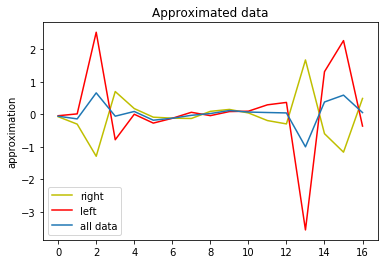

In [36]:
cA2am = cA2a.mean(axis=0)
cA2aml = cA2a[df.label=="left"].mean(axis=0)
cA2amr = cA2a[df.label=="right"].mean(axis=0)
plt.plot(cA2amr, 'y', label="right") 
plt.plot(cA2aml, 'r', label="left") 
plt.plot(cA2am, label="all data") 
plt.ylabel("approximation")
plt.legend()
plt.title("Approximated data")
plt.show() 

In [37]:
approx_real = cA2a.real
approx_imag = cA2a.imag

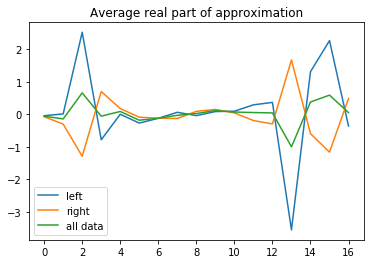

In [38]:
plt.plot(approx_real[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_real[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_real.mean(axis=0), label="all data")
plt.legend()
plt.title("Average real part of approximation")
plt.show()

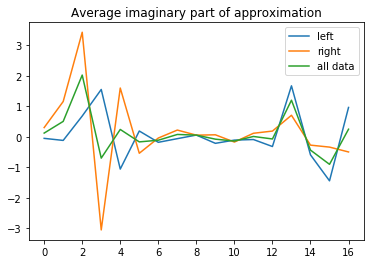

In [39]:
plt.plot(approx_imag[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_imag[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_imag.mean(axis=0), label="all data")
plt.legend()
plt.title("Average imaginary part of approximation")
plt.show()

In [40]:
approx_imag.shape

(1350, 17)

In [41]:
approx_imag = approx_imag.astype(np.float32)

In [42]:
cD2a = cD2a.astype(np.float32)

C:\Users\Kruspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [43]:
## Setting up NN

In [95]:
X = df.iloc[:,300:1000]
y = df.iloc[:,1000].values

In [96]:
## Renaming labels

In [103]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

In [104]:
## Splitting data

In [105]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [106]:
## Keras

In [107]:
model = Sequential()

In [108]:
model.add(Dense(128,input_shape=(700,),activation='tanh'))
model.add(Dense(265,activation='tanh'))
model.add(Dense(265,activation='tanh'))
model.add(Dense(2,activation='softmax'))

In [109]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               89728     
_________________________________________________________________
dense_14 (Dense)             (None, 265)               34185     
_________________________________________________________________
dense_15 (Dense)             (None, 265)               70490     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 532       
Total params: 194,935
Trainable params: 194,935
Non-trainable params: 0
_________________________________________________________________


In [111]:
## Train NN

In [112]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
945/945 [==============================] - 1s 927us/step - loss: 2.4891 - acc: 0.4688
Epoch 2/100
945/945 [==============================] - 0s 204us/step - loss: 0.8023 - acc: 0.5280
Epoch 3/100
945/945 [==============================] - 0s 216us/step - loss: 0.9959 - acc: 0.5132
Epoch 4/100
945/945 [==============================] - 0s 229us/step - loss: 0.8332 - acc: 0.4995
Epoch 5/100
945/945 [==============================] - 0s 214us/step - loss: 0.7805 - acc: 0.5333
Epoch 6/100
945/945 [==============================] - 0s 181us/step - loss: 0.8261 - acc: 0.4899
Epoch 7/100
945/945 [==============================] - 0s 193us/step - loss: 1.3454 - acc: 0.5005
Epoch 8/100
945/945 [==============================] - 0s 226us/step - loss: 1.1704 - acc: 0.4974
Epoch 9/100
945/945 [==============================] - 0s 192us/step - loss: 1.0031 - acc: 0.4794
Epoch 10/100
945/945 [==============================] - 0s 243us/step - loss: 0.9147 - acc: 0.5090
Epoch 11/100
945/94

945/945 [==============================] - 0s 228us/step - loss: 0.8638 - acc: 0.5968
Epoch 84/100
945/945 [==============================] - 0s 200us/step - loss: 0.9877 - acc: 0.5714
Epoch 85/100
945/945 [==============================] - 0s 206us/step - loss: 0.8665 - acc: 0.5947
Epoch 86/100
945/945 [==============================] - 0s 181us/step - loss: 0.8285 - acc: 0.5915
Epoch 87/100
945/945 [==============================] - 0s 198us/step - loss: 0.8048 - acc: 0.6000
Epoch 88/100
945/945 [==============================] - 0s 195us/step - loss: 0.8210 - acc: 0.6000
Epoch 89/100
945/945 [==============================] - 0s 204us/step - loss: 0.8080 - acc: 0.6042
Epoch 90/100
945/945 [==============================] - 0s 192us/step - loss: 0.7915 - acc: 0.6180
Epoch 91/100
945/945 [==============================] - 0s 207us/step - loss: 1.1494 - acc: 0.5831
Epoch 92/100
945/945 [==============================] - 0s 182us/step - loss: 1.0612 - acc: 0.5915
Epoch 93/100
945/945 [=

In [113]:
## Predict Test Set

In [114]:
y_pred = model.predict(X_test)

In [115]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [116]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       212
           1       0.51      0.52      0.52       193

   micro avg       0.53      0.53      0.53       405
   macro avg       0.53      0.53      0.53       405
weighted avg       0.53      0.53      0.53       405

[[115  97]
 [ 92 101]]


In [117]:
y_pred_class

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,